## Mission:
### Create a function that allows me to draw a custom regression line against two features. Incorporate error metrics into function.

### INITIALIZE

In [27]:
from __future__ import division
import seaborn as sns
sns.set(style='whitegrid', context='notebook')
#sns.reset_orig()
import pandas as pd
import urllib2
import numpy as np
from sklearn import datasets, linear_model
from sklearn.linear_model import LassoCV
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

In [30]:
target_url = ("https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data")
data = pd.read_csv(target_url,delim_whitespace = True)
data.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS','NOX', 'RM', 'AGE', 
                'DIS', 'RAD','TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

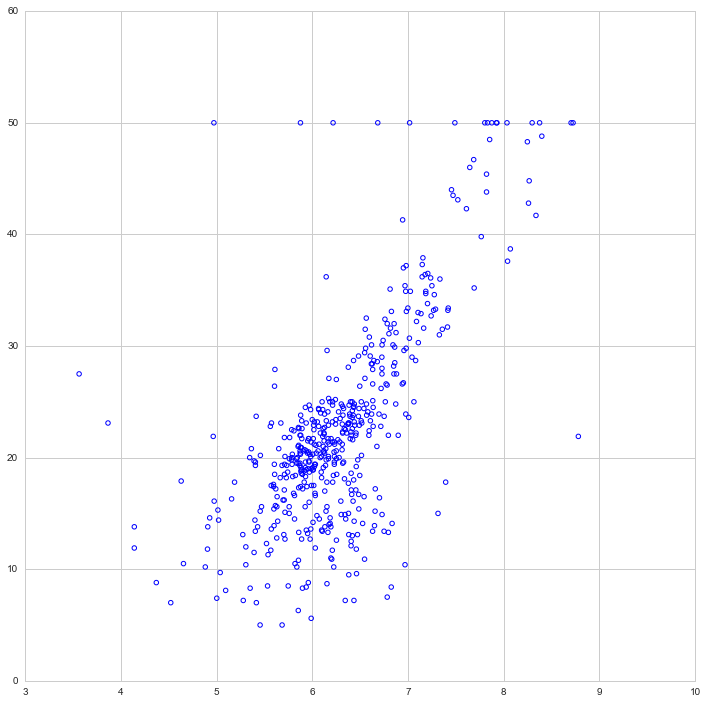

In [34]:
plt.scatter(data['RM'],data['MEDV'],color='b',facecolors='none',linewidth=1)
plt.rcParams['figure.figsize'] = (12,12)

### NORMALIZE:

In [96]:
from sklearn.preprocessing import normalize
np.set_printoptions(suppress=True,precision=4)

normalizer = normalize(data, norm='l2', axis=0, copy=True)
                                       #axis=0 normalizes each feature
                                       #axis=1 normalizes each sample, doesn't work here

norm_x = normalizer[:,:13]
norm_y = normalizer[:,13]

print(norm_x[0],norm_y[0])

(array([ 0.0001,  0.    ,  0.024 ,  0.    ,  0.0368,  0.0452,  0.0474,
        0.0509,  0.0069,  0.0244,  0.0426,  0.048 ,  0.028 ]), 0.039498590746602211)


In [97]:
data_norm = pd.DataFrame(normalizer,columns=data.columns)
data_norm[:10]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.000130,0.000000,0.024036,0,0.036828,0.045188,0.047361,0.050934,0.006883,0.024373,0.042614,0.047982,0.027976,0.039499
1,0.000130,0.000000,0.024036,0,0.036828,0.050564,0.036676,0.050934,0.006883,0.024373,0.042614,0.047490,0.012335,0.063454
2,0.000154,0.000000,0.007411,0,0.035964,0.049248,0.027492,0.062164,0.010325,0.022359,0.044768,0.047708,0.008999,0.061077
3,0.000329,0.000000,0.007411,0,0.035964,0.050297,0.032534,0.062164,0.010325,0.022359,0.044768,0.047982,0.016314,0.066197
4,0.000142,0.000000,0.007411,0,0.035964,0.045251,0.035235,0.062164,0.010325,0.022359,0.044768,0.047646,0.015947,0.052482
5,0.000421,0.021447,0.026756,0,0.041146,0.042309,0.039977,0.057019,0.017208,0.031322,0.036389,0.047825,0.038046,0.041876
6,0.000689,0.021447,0.026756,0,0.041146,0.043435,0.057685,0.061019,0.017208,0.031322,0.036389,0.047982,0.058615,0.049556
7,0.001007,0.021447,0.026756,0,0.041146,0.039628,0.060026,0.062368,0.017208,0.031322,0.036389,0.046741,0.091611,0.030173
8,0.000811,0.021447,0.026756,0,0.041146,0.042253,0.051562,0.067598,0.017208,0.031322,0.036389,0.046750,0.052340,0.034561
9,0.001072,0.021447,0.026756,0,0.041146,0.044878,0.056605,0.065081,0.017208,0.031322,0.036389,0.047453,0.062594,0.027430


### DATA SCATTERPLOT FUNCTION:

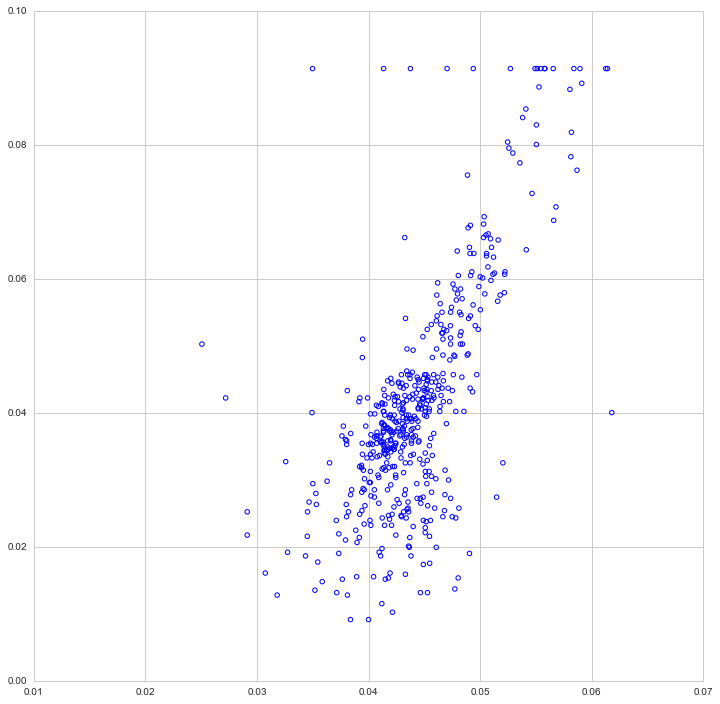

In [179]:
def data_scatter(x,y):
    plt.scatter(x,y,color='b',facecolors='none',linewidth=1)
    plt.rcParams['figure.figsize'] = (12,12)
    
data_scatter(data_norm['RM'],data_norm['MEDV'])

### PLOT MY OWN LINE THROUGH IT:

mse: 0.00236406890267
rmse: 0.0486216916887

slope: 3.0
intercept: -0.088


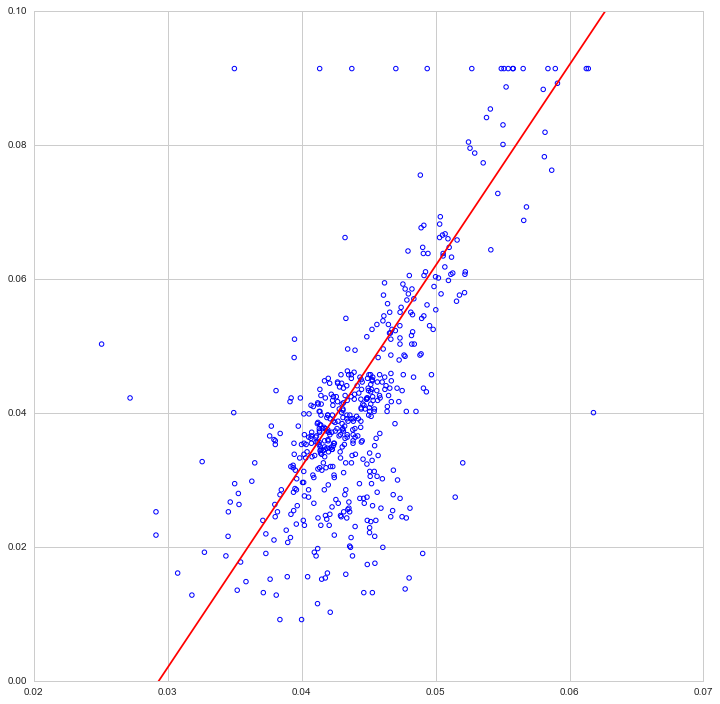

In [193]:
def customLine(data_xval,data_yval,slope,x_point,y_point,
             show_return,min_axis,max_axis,max_axis_y):
    
    import math
    
    y_intercept = y_point - slope*x_point
    
    axis_length = np.linspace(min_axis,max_axis)
    function = [((slope*x) + y_intercept) for x in axis_length]
    
    plt.rcParams['figure.figsize'] = (12,12)
    plt.plot(axis_length,function,color='r')
        
    plt.xlim(min_axis,max_axis)
    plt.ylim(0,max_axis_y)
    
    mse = (sum([(function[xx]-data_yval[xx])**2 for xx in range(len(function))]))/len(function)
    rmse = math.sqrt(mse)

    print('mse: %s') % mse
    print('rmse: %s') % rmse
    print('')
    print('slope: %s') % slope
    print('intercept: %s') % y_intercept

data_scatter(data_norm['RM'],data_norm['MEDV'])

#data_xval,data_yval,slope,x_point,y_point,show_return,min_axis,max_axis,max_axis_y
customLine(data_norm['RM'],data_norm['MEDV'],3.0,.041,.035,'r',.02,.07,.1)

plt.show()